# MNIST Handwritten Digit Classificatoin using a Neural Network

GOAL: Build a predictive system to predict handwritten digits(0-9)

Workflow:
1. Load dataset & processed images from keras
2. Train Test split
3. Train Neural Network
4. Evaluate accuracy

In [1]:
# libraries needed
import numpy as np # numpy arrays
import matplotlib.pyplot as plt # Data visuallization 
import seaborn as sns # Data visuallization
import cv2 #image processing
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.MNIST

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
type(X_train)

numpy.ndarray

In [4]:
# already put as a numpy array

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


we have 60,000 images for training, 28x28 is the dimension of each image

x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

In [6]:
# printing the 10th image from training dataset
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

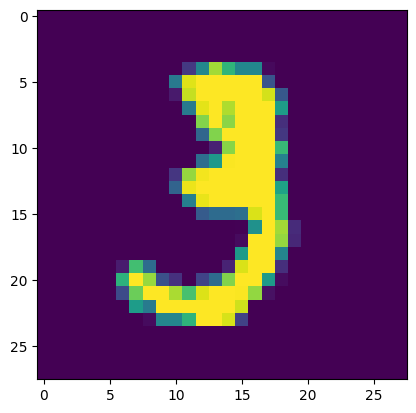

3


In [7]:
# displaying the image
plt.imshow(X_train[10])
plt.show()

# printing the corresponding label
print(Y_train[10])

Image labels

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# unique values in Y_train

print(np.unique(Y_train))

# unique values in Y_test

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
# scaling the values to be from 0 to 1

X_train = X_train/255
X_test = X_test/255

In [11]:
# printing the 10th image from training dataset
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [12]:
# setting up the layers of the Nueral Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer
    keras.layers.Dense(50, activation='relu'), # hidden layer
    keras.layers.Dense(50, activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

In [13]:
# compiling the Neural Network
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [14]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3056 - accuracy: 0.9116
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1402 - accuracy: 0.9573
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1017 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0822 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0671 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0583 - accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0511 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0441 - accuracy: 0.9855
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0381 - accuracy: 0.9874
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.033

 ~98.8% accuracy on training data

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0922 - accuracy: 0.9762
0.9761999845504761


 ~97.% accuracy on training data

In [16]:
print(X_test.shape)

(10000, 28, 28)


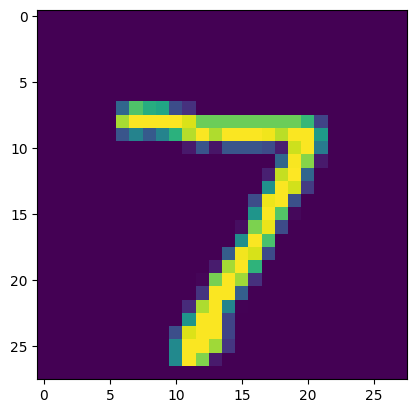

In [17]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


Checking for individual prediction

In [19]:
Y_predict = model.predict(X_test) # storing the prediction

313/313 [==============================] - 1s 2ms/step


In [20]:
print(Y_predict.shape)

(10000, 10)


In [21]:
print(Y_predict[0]) # we can see the likely hood of the model predicting a number 0 - 9

[6.4912386e-04 2.3921342e-05 1.9844635e-01 9.7723013e-01 2.3517764e-08
 9.2458446e-03 8.4393360e-12 9.9999952e-01 1.1785597e-01 3.5934660e-01]


In [22]:
# converting the prediction probabilities to class label for first image

label_for_first_image = np.argmax(Y_predict[0])
print(label_for_first_image)


7


In [23]:
# # converting the prediction probabilities to class label for all test data points
Y_predict_labels = [np.argmax(i) for i in Y_predict]
print(Y_predict_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 7, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
conf_mat = confusion_matrix(Y_test, Y_predict_labels) #Building a confusion matrix to compare predicted labels and actual labels

In [25]:
print(conf_mat)

tf.Tensor(
[[ 968    0    2    0    1    1    4    2    2    0]
 [   0 1118    3    3    0    1    2    1    7    0]
 [   1    1 1005    2    2    1    4   10    6    0]
 [   0    0    4  973    0   21    0    6    4    2]
 [   0    0    5    0  956    2    2    4    0   13]
 [   2    0    0    6    2  868    3    1    5    5]
 [   2    1    1    2    6    5  941    0    0    0]
 [   0    3    8    2    1    0    0 1010    2    2]
 [   6    0    4    4    3    2    1    8  944    2]
 [   2    2    1    2    5    4    1   10    3  979]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, ' Predicted labels')

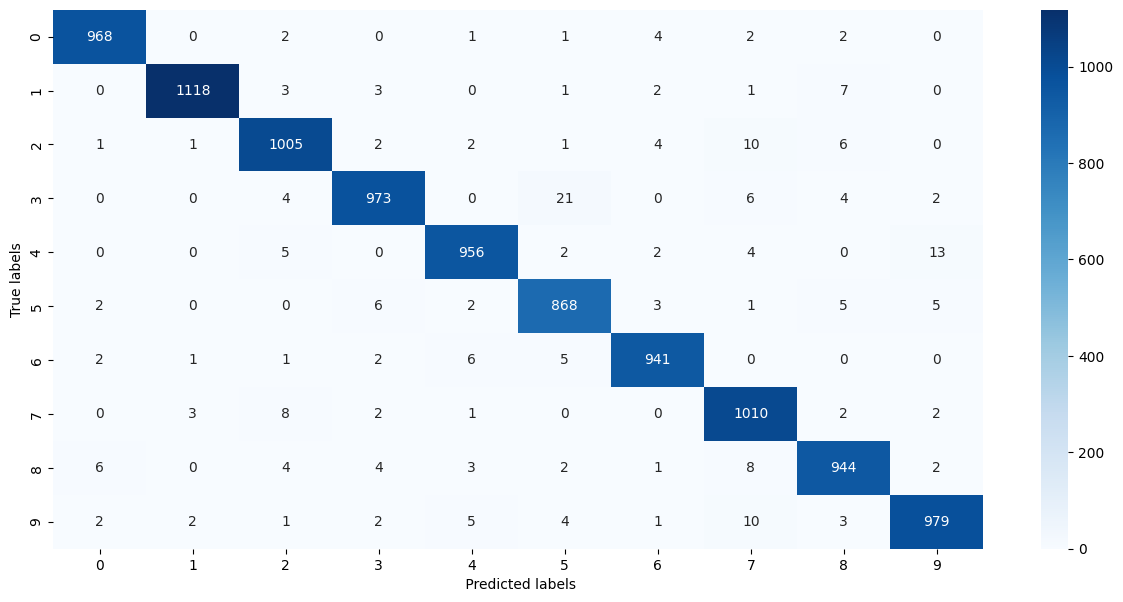

In [26]:
# constructing a heatmap
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt= 'd', cmap = 'Blues')
plt.ylabel('True labels')
plt.xlabel(' Predicted labels')
          

Predicting a sample image

In [27]:
input_image = cv2.imread('MNIST_digit.png') # uploading image
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

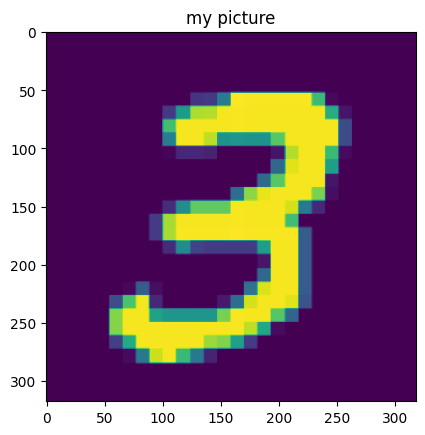

In [28]:
plt.imshow(gray)
plt.title('my picture')
plt.show()

In [29]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY) # changing the color of the image to gray

In [30]:
input_image_resize = cv2.resize(grayscale, (28,28)) # converting dimension 

In [31]:
input_image_resize.shape

(28, 28)

In [32]:
# successfully resized

In [33]:
input_image_resize = input_image_resize/255 # rescaling it

In [34]:
image_reshaped = np.reshape(input_image_resize, [1,28,28]) # reshaping it as we are predicting 1 image only

In [35]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 36ms/step
[[5.0274537e-12 6.5227454e-07 8.9491739e-05 1.0000000e+00 2.9906446e-16
  3.4160174e-02 2.5964478e-21 6.4525229e-05 4.7480385e-03 9.4232726e-01]]


In [36]:
input_image_prediction_label = np.argmax(input_prediction)

In [37]:
print(input_image_prediction_label)

3


Number predicted successfully

# Building a predictive system: 

Path of the image to be predicted:  MNIST_digit.png


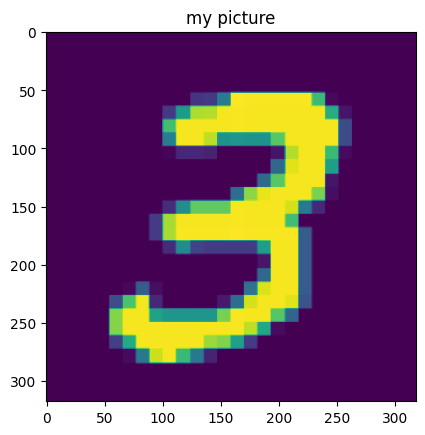

1/1 [==============================] - 0s 34ms/step
The Handwritten Digit is recognised as  3


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

input_image = cv2.imread('MNIST_digit.png') # uploading image
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.title('my picture')
plt.show()
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)